In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('reduced_var_data.csv', index_col = 0)
y = data['SalePrice']
x = data.drop(labels = 'SalePrice', axis=1)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [4]:
pipe = Pipeline(steps= [('ss', StandardScaler()), ('clf', SVR(gamma='scale'))])

In [5]:
param_grid = {
    'clf__C':[0.1, 0.5, 1.0, 1.5, 10,100, 150],
    'clf__kernel': ['linear', 'rbf', 'sigmoid', 'poly']
}

search = GridSearchCV(pipe, param_grid, cv=5, iid=False, scoring='neg_mean_absolute_error',
                      return_train_score=False)
search.fit(x, y)          # Here I am using the whole training data
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-19736.160):
{'clf__C': 150, 'clf__kernel': 'linear'}


In [7]:
best_svr = SVR(kernel='linear', gamma ='scale', C = 150)
best_svr.fit(x_train, y_train)
y_pred = best_svr.predict(x_test)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

18799.026333339327
0.8607851431235201


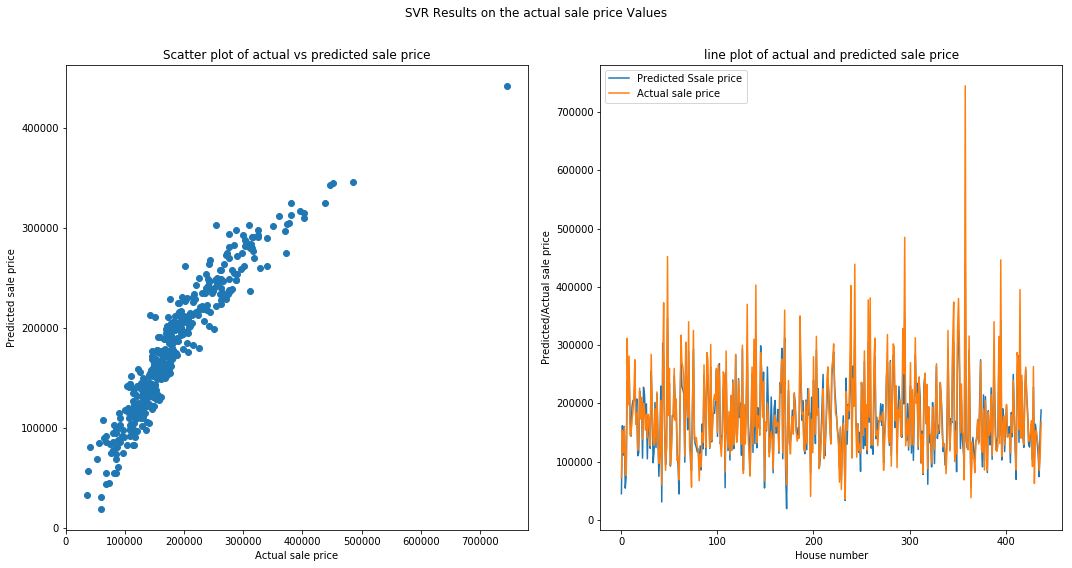

In [8]:
y_pred = best_svr.predict(x_test)
fig = plt.figure(figsize=(15,8))
fig.suptitle('SVR Results on the actual sale price Values')
plt.subplot(121)
plt.scatter(y_test.values, y_pred)
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.title('Scatter plot of actual vs predicted sale price')
plt.subplot(122)
plt.plot((y_pred), label='Predicted Ssale price')
plt.plot((y_test.values), label='Actual sale price')
plt.xlabel('House number')
plt.ylabel('Predicted/Actual sale price')
plt.title('line plot of actual and predicted sale price')
plt.legend()
plt.tight_layout()
fig.subplots_adjust(top=0.88)

In [9]:
print("Corrolation between true and predicted value using SVR on the actual sale price is {}".\
      format(np.corrcoef(y_test,y_pred)[0][1]))

Corrolation between true and predicted value using SVR on the actual sale price is 0.9377106146891446


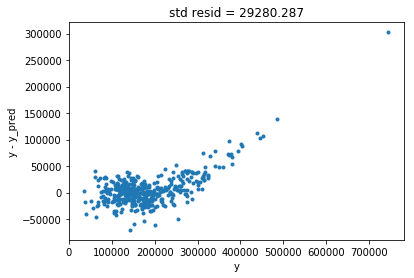

In [10]:
resid = y_test - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
plt.plot(y_test,y_test-y_pred,'.')
plt.xlabel('y')
plt.ylabel('y - y_pred');
plt.title('std resid = {:.3f}'.format(std_resid));

As shown in the figures above, There are some outliers which increase the value of the RMSE and the std of the residual.

### Try working on log(Sale price)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, np.log(y), test_size = 0.3, random_state = 42)
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)
search.fit(x, np.log(y))          # Here I am using the whole training data
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.092):
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [13]:
best_svr = SVR(kernel='linear', gamma ='scale', C = 0.1)
best_svr.fit(x_train, y_train)
y_pred = best_svr.predict(x_test)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.09144293834328242
0.905670268879284


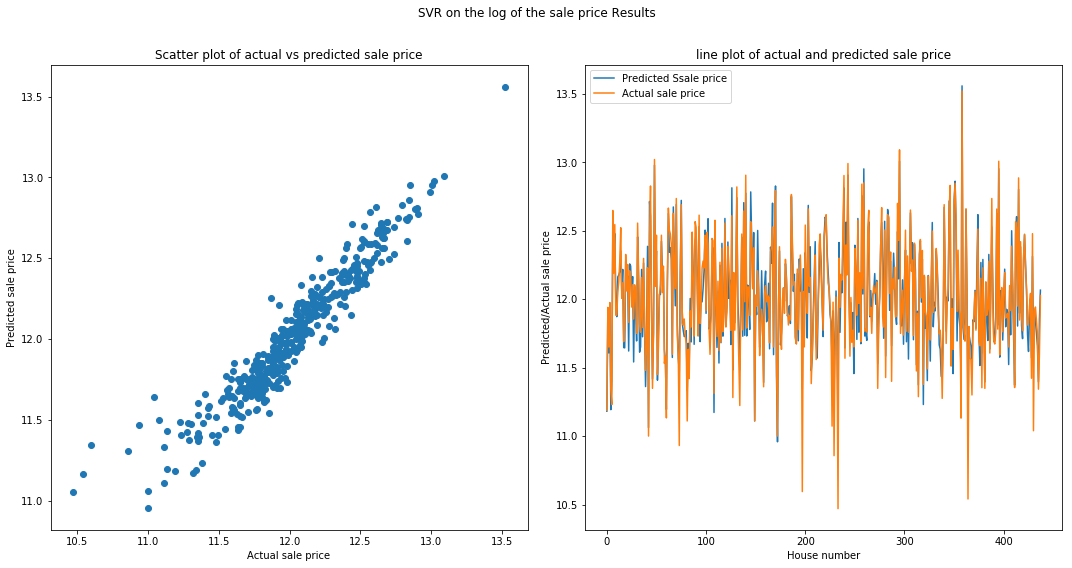

In [14]:
y_pred = best_svr.predict(x_test)
fig = plt.figure(figsize=(15,8))
fig.suptitle('SVR on the log of the sale price Results')
plt.subplot(121)
plt.scatter(y_test.values, y_pred)
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.title('Scatter plot of actual vs predicted sale price')
plt.subplot(122)
plt.plot((y_pred), label='Predicted Ssale price')
plt.plot((y_test.values), label='Actual sale price')
plt.xlabel('House number')
plt.ylabel('Predicted/Actual sale price')
plt.title('line plot of actual and predicted sale price')
plt.legend()
plt.tight_layout()
fig.subplots_adjust(top=0.88)

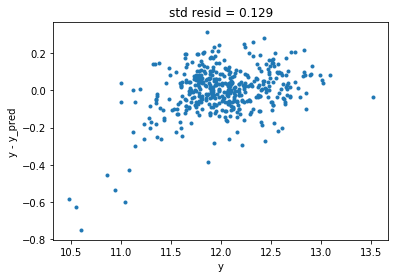

In [15]:
resid = y_test - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
plt.plot(y_test,y_test-y_pred,'.')
plt.xlabel('y')
plt.ylabel('y - y_pred');
plt.title('std resid = {:.3f}'.format(std_resid));

In [16]:
print("Corrolation between true and predicted value using SVR on the log of sale price is {}".\
      format(np.corrcoef(y_test,y_pred)[0][1]))

Corrolation between true and predicted value using SVR on the log of sale price is 0.9518432250878917


Working on the actual value of the sale price is better than working on log od the sale price